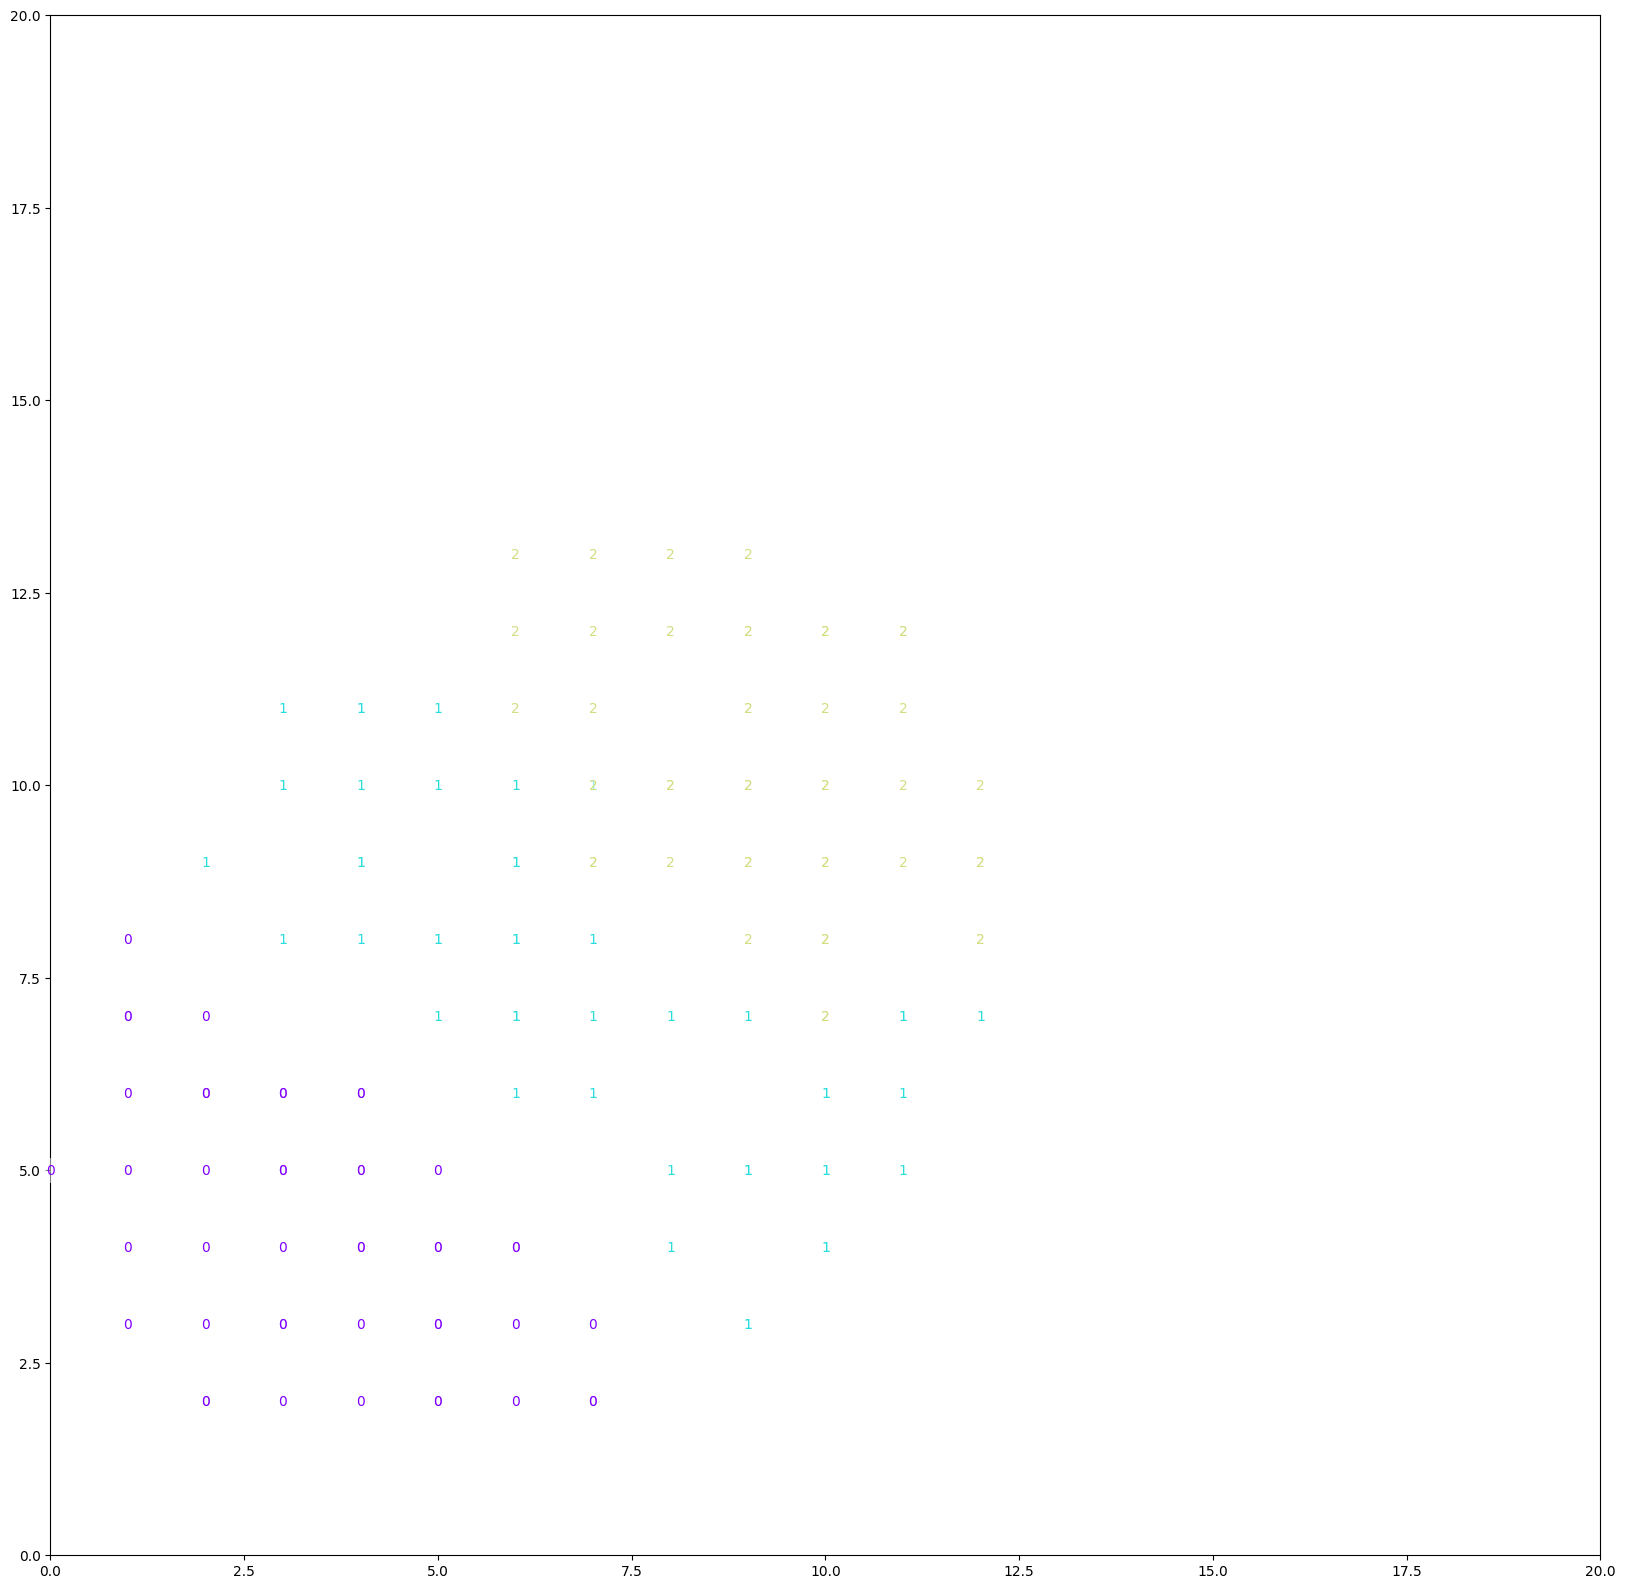

Duomenų objekto 1 numeris: (3, 5), neuronas-nugalėtojas: [5.03919652 3.53404879 1.37783543 0.24997132]
Duomenų objekto 2 numeris: (1, 7), neuronas-nugalėtojas: [4.83893421 2.9808862  1.40071654 0.25009061]
Duomenų objekto 3 numeris: (1, 5), neuronas-nugalėtojas: [4.70069389 3.20545567 1.285127   0.19244638]
Duomenų objekto 4 numeris: (3, 2), neuronas-nugalėtojas: [4.60709337 3.10530595 1.50352194 0.20007623]
Duomenų objekto 5 numeris: (3, 5), neuronas-nugalėtojas: [5.03919652 3.53404879 1.37783543 0.24997132]
Duomenų objekto 6 numeris: (6, 4), neuronas-nugalėtojas: [5.42343464 3.88011054 1.68015617 0.37982883]
Duomenų objekto 7 numeris: (2, 4), neuronas-nugalėtojas: [4.63983581 3.38590839 1.37310367 0.28151672]
Duomenų objekto 8 numeris: (3, 6), neuronas-nugalėtojas: [5.0454668  3.39866085 1.49546776 0.20234577]
Duomenų objekto 9 numeris: (2, 2), neuronas-nugalėtojas: [4.41053035 2.98910503 1.32648413 0.19990459]
Duomenų objekto 10 numeris: (2, 6), neuronas-nugalėtojas: [4.90313462 3.1

In [54]:
import numpy as np
from minisom import MiniSom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Duomenų skaitymas ir paruošimas
data = pd.read_csv('data\iris.data', header=None)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# SOM parametrai
som_size = 20
som = MiniSom(som_size, som_size, len(x[0]), sigma=1.0, learning_rate=1)
som.train_random(x, 1500)

# SOM atvaizdavimas
plt.figure(figsize=(som_size, som_size))
for i, xx in enumerate(x):
    w = som.winner(xx)
    plt.text(w[0], w[1], str(y_encoded[i]), color=plt.cm.rainbow(y_encoded[i] / len(set(y_encoded))), ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))

plt.axis([0, som_size, 0, som_size])
plt.show()

# Spausdinami SOM neuronų svoriai, neuronai nugalėtojai ir jiems priskirti duomenų objektai
winners = []
for i, xx in enumerate(x):
    w = som.winner(xx)
    winners.append(w)
    print(f'Duomenų objekto {i+1} numeris: {w}, neuronas-nugalėtojas: {som.get_weights()[w[0], w[1]]}')

# Atspausdinama kvantavimo paklaidos reikšmė
print(f'Kvantavimo paklaidos reikšmė: {som.quantization_error(x)}')
